**Our Project RQ**:
How can expanding Fair Fares' eligibility criteria to “200% of the federal poverty level” in key NYC neighborhoods (Elmhurst/Jackson Heights, Flushing, Sunset Park, Brownsville, Morrisania, and Highbridge) improve access to affordable public transportation, and what specific subway and bus routes should be prioritized for expansion?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# note: all the data in both the bus and subway datasets are already Fair Fares -> filtered before on portal
import pandas as pd

# subway data
file_path_1 = '/content/drive/MyDrive/mhc_all_advanced_datasets/advance level (only fair fares & 2024)/subway_ridership.csv'
subway_df = pd.read_csv(file_path_1)
subway_df.tail()

<ipython-input-20-4c6fcd5364bc>:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  subway_df = pd.read_csv(file_path_1)


,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
1459123,05/05/2024 12:00:00 PM,tram,TRAM1,RI Tramway (Manhattan),Manhattan,metrocard,Metrocard - Fair Fare,5,1,40.761337,-73.96416,POINT (-73.96416 40.761337)
1459124,05/05/2024 02:00:00 PM,tram,TRAM1,RI Tramway (Manhattan),Manhattan,metrocard,Metrocard - Fair Fare,1,0,40.761337,-73.96416,POINT (-73.96416 40.761337)
1459125,05/15/2024 03:00:00 PM,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,metrocard,Metrocard - Fair Fare,5,0,40.757340,-73.95412,POINT (-73.95412 40.75734)
1459126,06/23/2024 10:00:00 PM,tram,TRAM1,RI Tramway (Manhattan),Manhattan,metrocard,Metrocard - Fair Fare,2,0,40.761337,-73.96416,POINT (-73.96416 40.761337)
1459127,04/18/2024 08:00:00 PM,tram,TRAM2,RI Tramway (Roosevelt),Manhattan,metrocard,Metrocard - Fair Fare,3,0,40.757340,-73.95412,POINT (-73.95412 40.75734)


In [ ]:
print(subway_df.head())
print()
print(f'We can work with {len(subway_df):,} rows to manipulate the 12 variables in the subway dataset.')

        transit_timestamp transit_mode station_complex_id  station_complex  \
0  09/13/2024 04:00:00 AM       subway                347  Saratoga Av (3)   
1  09/13/2024 11:00:00 PM       subway                339  Bergen St (2,3)   
2  09/13/2024 05:00:00 AM       subway                 35      59 St (N,R)   
3  09/13/2024 12:00:00 AM       subway                 61        50 St (D)   
4  09/13/2024 04:00:00 AM       subway                248     Avenue N (F)   

    borough payment_method    fare_class_category  ridership  transfers  \
0  Brooklyn      metrocard  Metrocard - Fair Fare          1          0   
1  Brooklyn      metrocard  Metrocard - Fair Fare         11          0   
2  Brooklyn      metrocard  Metrocard - Fair Fare         13          0   
3  Brooklyn      metrocard  Metrocard - Fair Fare          1          0   
4  Brooklyn      metrocard  Metrocard - Fair Fare          2          0   

    latitude  longitude                 Georeference  
0  40.661453  -73.91633  

In [ ]:
file_path_2 = '/content/drive/MyDrive/mhc_all_advanced_datasets/advance level (only fair fares & 2024)/bus_ridership.csv'
bus_df = pd.read_csv(file_path_2)
print(bus_df.head())
print()
print(f'We can work with {len(bus_df):,} rows to manipulate 6 variables in the bus dataset.')

        transit_timestamp bus_route payment_method    fare_class_category  \
0  09/12/2024 03:00:00 PM       B16      metrocard  Metrocard - Fair Fare   
1  09/12/2024 12:00:00 AM       B26      metrocard  Metrocard - Fair Fare   
2  09/12/2024 06:00:00 PM       B37      metrocard  Metrocard - Fair Fare   
3  09/12/2024 01:00:00 AM       B44      metrocard  Metrocard - Fair Fare   
4  09/12/2024 07:00:00 AM       B62      metrocard  Metrocard - Fair Fare   

   ridership  transfers  
0     21.003      4.002  
1      3.019      0.000  
2      6.012      1.001  
3      0.000      0.000  
4     35.008      7.004  

We can work with 968,970 rows to manipulate 6 variables in the bus dataset.


In [ ]:
# querying to extract information
import sqlite3

# connecting
connection = sqlite3.connect(':memory:')

# loading the subway and bus pandas DataFrames to SQLite as a table
subway_df.to_sql('subway_df', connection, index=False, if_exists='replace')
bus_df.to_sql('bus_df', connection, index=False, if_exists='replace')

# using cursor object, which is a database object that will allow us to retrieve and manipulate each row one at a time
cursor = connection.cursor()

In [ ]:
# checking whether the query works or not on both datasets

query1 = 'SELECT * FROM subway_df LIMIT 5'
cursor.execute(query1)
#result1 = cursor.fetchall() - for 1 line of output
result_subway_df = pd.read_sql_query(query1, connection) # more clear output to read
print(result_subway_df)

        transit_timestamp transit_mode station_complex_id  station_complex  \
0  09/13/2024 04:00:00 AM       subway                347  Saratoga Av (3)   
1  09/13/2024 11:00:00 PM       subway                339  Bergen St (2,3)   
2  09/13/2024 05:00:00 AM       subway                 35      59 St (N,R)   
3  09/13/2024 12:00:00 AM       subway                 61        50 St (D)   
4  09/13/2024 04:00:00 AM       subway                248     Avenue N (F)   

    borough payment_method    fare_class_category  ridership  transfers  \
0  Brooklyn      metrocard  Metrocard - Fair Fare          1          0   
1  Brooklyn      metrocard  Metrocard - Fair Fare         11          0   
2  Brooklyn      metrocard  Metrocard - Fair Fare         13          0   
3  Brooklyn      metrocard  Metrocard - Fair Fare          1          0   
4  Brooklyn      metrocard  Metrocard - Fair Fare          2          0   

    latitude  longitude                 Georeference  
0  40.661453  -73.91633  

In [ ]:
query2 = 'SELECT * FROM bus_df LIMIT 5'
cursor.execute(query2)
#result2 = cursor.fetchall()
result_bus_df = pd.read_sql_query(query2, connection)
print(result_bus_df)

        transit_timestamp bus_route payment_method    fare_class_category  \
0  09/12/2024 03:00:00 PM       B16      metrocard  Metrocard - Fair Fare   
1  09/12/2024 12:00:00 AM       B26      metrocard  Metrocard - Fair Fare   
2  09/12/2024 06:00:00 PM       B37      metrocard  Metrocard - Fair Fare   
3  09/12/2024 01:00:00 AM       B44      metrocard  Metrocard - Fair Fare   
4  09/12/2024 07:00:00 AM       B62      metrocard  Metrocard - Fair Fare   

   ridership  transfers  
0     21.003      4.002  
1      3.019      0.000  
2      6.012      1.001  
3      0.000      0.000  
4     35.008      7.004  


In [ ]:
column_names = subway_df.columns
print(column_names)

column_names = bus_df.columns
print(column_names)

Index(['transit_timestamp', 'transit_mode', 'station_complex_id',
       'station_complex', 'borough', 'payment_method', 'fare_class_category',
       'ridership', 'transfers', 'latitude', 'longitude', 'Georeference'],
      dtype='object')
Index(['transit_timestamp', 'bus_route', 'payment_method',
       'fare_class_category', 'ridership', 'transfers'],
      dtype='object')


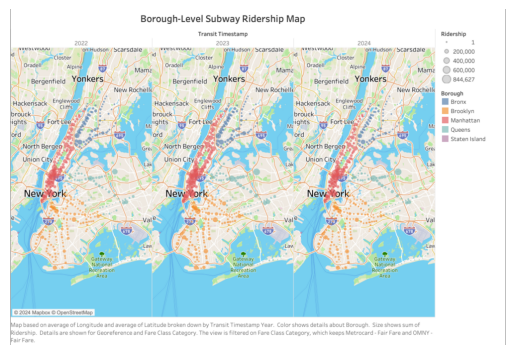

In [ ]:
# importing matplotlib library to add the image visualized by tableau for subway lines throughout past 3 years for the five NYC boroughs
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_path_1 = "/content/drive/MyDrive/mhc_all_advanced_datasets/extras/subway_map.png"
img = mpimg.imread(pic_path_1)
plt.imshow(img)
plt.axis('off')
plt.show()

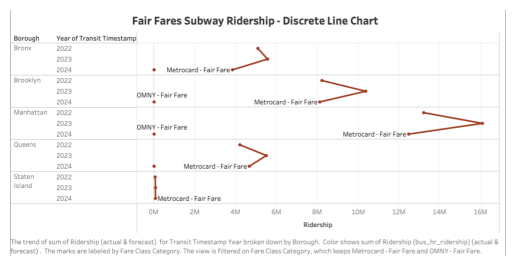

In [ ]:
# supporting the map visualization, adding a discrete line chart for subway ridership throughout 2022, 2023, and 2024 for the five NYC boroughs
pic_path_2 = "/content/drive/MyDrive/mhc_all_advanced_datasets/extras/subway_chart.png"
img = mpimg.imread(pic_path_2)
plt.imshow(img)
plt.axis('off')
plt.show()

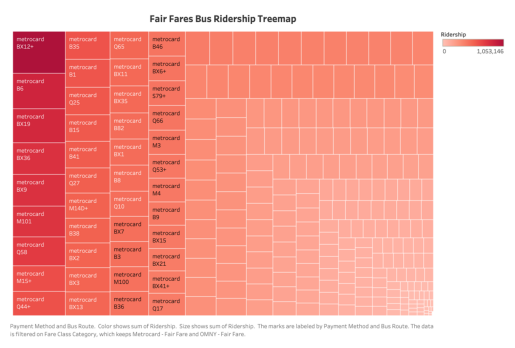

In [ ]:
# importing another visual from tableau for bus ridership, where the focus on the program's expansion could be achieved in such districts/neighborhoods of mainly the Bronx, Brooklyn, and Queens boroughs
pic_path_3 = "/content/drive/MyDrive/mhc_all_advanced_datasets/extras/bus_treemap.png"
img = mpimg.imread(pic_path_3)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# count for the most-used bus routes to focus on the expansion in these areas
from tabulate import tabulate

query = '''SELECT bus_route, COUNT(*) AS count
           FROM bus_df
           GROUP BY bus_route
           ORDER BY count DESC
           LIMIT 10'''


cursor.execute(query)

result_df = pd.read_sql_query(query, connection)
print(tabulate(result_df, headers = 'keys', tablefmt = 'pretty'))

+---+-----------+-------+
|   | bus_route | count |
+---+-----------+-------+
| 0 |    B15    | 4084  |
| 1 |    Q10    | 4049  |
| 2 |    Q58    | 4047  |
| 3 |   M101    | 4031  |
| 4 |    M15    | 4021  |
| 5 |    Q25    | 4016  |
| 6 |    Q60    | 3994  |
| 7 |    Q66    | 3976  |
| 8 |    Q27    | 3969  |
| 9 |    Q65    | 3967  |
+---+-----------+-------+
